## United States Economic Forecast Project- Oussama Ennaciri
## Feature Engineering

We begin by loading the cleaned merged dataset, which includes both quarterly indicators and monthly data that has been aggregated to a quarterly format.

In [125]:
import seaborn as sns
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [126]:
host = r'127.0.0.1'
db = r'MSDS610' 
user = r'postgres'
pw = r'password' 
port = r'5432' 

In [127]:
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [128]:
table_name = r'economic_indicators_clean'
schema = r'cleaned' 

economic_indicators_cleaned = pd.read_sql_table(table_name, db_conn, schema)

In [129]:
economic_indicators_cleaned.head()

,observation_date,HOUST,UNRATE,FEDFUNDS,GS10,CPIAUCSL,USREC,A053RC1Q027SBEA,GDPC1,IMPGSC1,EXPGSC1,GCEC1
0,1959-01-01,1648.0,5.8,2.57,3.99,28.993,0.0,55.502,3352.129,115.440,89.697,1142.671
1,1959-04-01,1530.0,5.1,3.08,4.26,29.043,0.0,60.398,3427.667,121.057,88.981,1156.740
2,1959-07-01,1506.0,5.3,3.58,4.50,29.193,0.0,54.549,3430.057,122.212,97.562,1166.589
3,1959-10-01,1457.0,5.6,3.99,4.58,29.370,0.0,53.368,3439.832,119.109,92.734,1157.052
4,1960-01-01,1357.0,5.1,3.93,4.49,29.397,0.0,58.778,3517.181,123.608,104.686,1137.363


## Feature Engineering

Our problem statement is: "Is the U.S. economy heading toward a recession or growth?"
A key question to answer this would be: "Will GDP grow or decline relative to the previous quarter?" However, instead of predicting GDP growth directly, we train a model using the economic indicators as features and the recession indicator as the target. 

In [130]:
economic_indicators_cleaned["Interest_Rate_Spread"] = economic_indicators_cleaned["GS10"] - economic_indicators_cleaned["FEDFUNDS"]

I added the Interest Rate Spread (GS10 - FEDFUNDS) to see the gap between long-term and short-term interest rates. When this gap gets smaller or turns negative, it signals a coming recession, as investors expect slower growth. A wider gap suggests confidence in the economy. 

In [131]:
economic_indicators_cleaned["Unemployment_Rate_Change"] = economic_indicators_cleaned["UNRATE"].diff()

I added Unemployment Rate Change to track shifts in the job market. A rising unemployment rate can signal economic weakness, while a declining rate suggests growth. By monitoring these changes, I cantrain my model to understand and predict economic cycles.

In [132]:
economic_indicators_cleaned["Real_GDP_Growth_Rate"] = economic_indicators_cleaned["GDPC1"].pct_change() * 100

I added Real GDP Growth Rate to measure how the economy is expanding or contracting over time.A positive growth rate indicates expansion, while a negative rate signals a slowdown or recession.

In [133]:
economic_indicators_cleaned['Net_Exports'] = economic_indicators_cleaned['EXPGSC1'] - economic_indicators_cleaned['IMPGSC1']

I added Net Exports to measure the difference between exports and imports. A positive value means the country is exporting more than it imports, contributing to economic growth, while a negative value indicates a trade deficit.

In [138]:
economic_indicators_cleaned

,observation_date,HOUST,UNRATE,FEDFUNDS,GS10,CPIAUCSL,USREC,A053RC1Q027SBEA,GDPC1,IMPGSC1,EXPGSC1,GCEC1,Interest_Rate_Spread,Unemployment_Rate_Change,Real_GDP_Growth_Rate,Net_Exports
0,1960-01-01,1357.0,5.1,3.93,4.49,29.397,0,58.778,3517.181,123.608,104.686,1137.363,0.56,-0.5,2.248627,-18.922
1,1960-04-01,1269.0,5.2,3.70,4.26,29.573,1,54.428,3498.246,124.527,107.689,1150.170,0.56,0.1,-0.538357,-16.838
2,1960-07-01,1213.0,5.5,2.94,3.83,29.590,1,52.155,3515.385,120.857,110.036,1178.324,0.89,0.3,0.489931,-10.821
3,1960-10-01,1185.0,6.3,2.30,3.89,29.780,1,50.050,3470.278,115.156,110.622,1186.511,1.59,0.8,-1.283131,-4.534
4,1961-01-01,1240.0,6.8,2.00,3.79,29.840,1,49.179,3493.703,114.599,109.861,1204.136,1.79,0.5,0.675018,-4.738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2023-07-01,1380.0,3.7,5.26,4.15,306.042,0,3748.928,22780.933,3460.391,2521.467,3836.304,-1.11,0.2,1.071523,-938.924
255,2023-10-01,1481.0,3.8,5.33,4.44,308.158,0,3887.693,22960.600,3496.290,2559.591,3870.720,-0.89,0.1,0.788673,-936.699
256,2024-01-01,1407.0,3.8,5.33,4.16,310.974,0,3962.994,23053.545,3548.749,2571.763,3887.718,-1.17,0.0,0.404802,-976.986
257,2024-04-01,1340.0,4.0,5.33,4.44,313.096,0,4088.703,23223.906,3614.047,2578.386,3917.049,-0.89,0.2,0.738980,-1035.661


In [139]:
economic_indicators_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   observation_date          259 non-null    datetime64[ns]
 1   HOUST                     259 non-null    float64       
 2   UNRATE                    259 non-null    float64       
 3   FEDFUNDS                  259 non-null    float64       
 4   GS10                      259 non-null    float64       
 5   CPIAUCSL                  259 non-null    float64       
 6   USREC                     259 non-null    int64         
 7   A053RC1Q027SBEA           259 non-null    float64       
 8   GDPC1                     259 non-null    float64       
 9   IMPGSC1                   259 non-null    float64       
 10  EXPGSC1                   259 non-null    float64       
 11  GCEC1                     259 non-null    float64       
 12  Interest_Rate_Spread  

In [140]:
X = economic_indicators_cleaned.drop(columns=['USREC', 'observation_date']) 
y = economic_indicators_cleaned['USREC'] 

In this step, I define X as my feature set by dropping the USREC column which indicates recession periods, and observation_date since dates are not useful for training my model. The variable y is my target, containing the USREC values, which I will use to train my model to predict recessions based on economic indicators.

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train.values, y_train)
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

We evaluated the performance of the features and noticed that two of the newly engineered features, Unemployment_Rate_Change and Real_GDP_Growth_Rate, ranked the highest, meaning they contributed more to predicting recessions than the original features they were derived from, Real Gross Domestic Product and Unemployment Rate. Net_Exports ranked 4th, higher than the features used to engineer it, which were Real Imports of Goods and Services and Real Exports of Goods and Services. The last ranked feature I engineered, Interest_Rate_Spread, ranked 8th, falling behind the original features, Federal Funds Effective Rate and Market Yield on U.S. Treasury Securities at 10-Year, indicating it had a smaller influence on the model compared to those features.

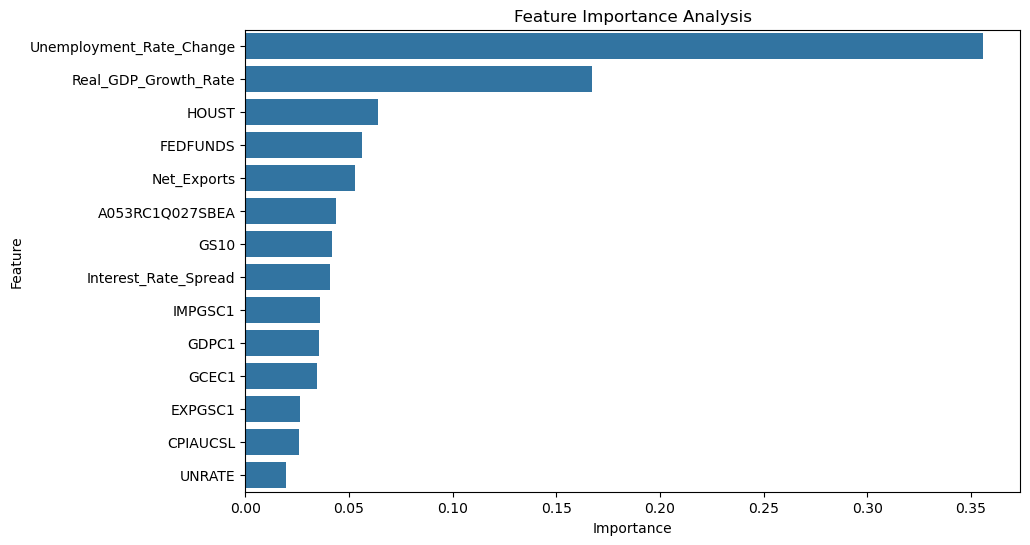

In [143]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance Analysis")
plt.show()

The heatmap for economic_indicators_cleaned visualizes the relationships between all numerical variables in the dataset. Its results align closely with our feature importance analysis, with minor differences in ranking. The first two newly engineered features also rank highest in the heatmap. However, the heatmap provides additional insights by indicating whether correlations are positive or negative. Real_GDP_Growth_Rate is negatively correlated with the recession indicator, while Unemployment_Rate_Change is positively correlated, which makes sense given economic trends. Additionally, the heatmap highlights several highly correlated features, suggesting potential redundancy. 

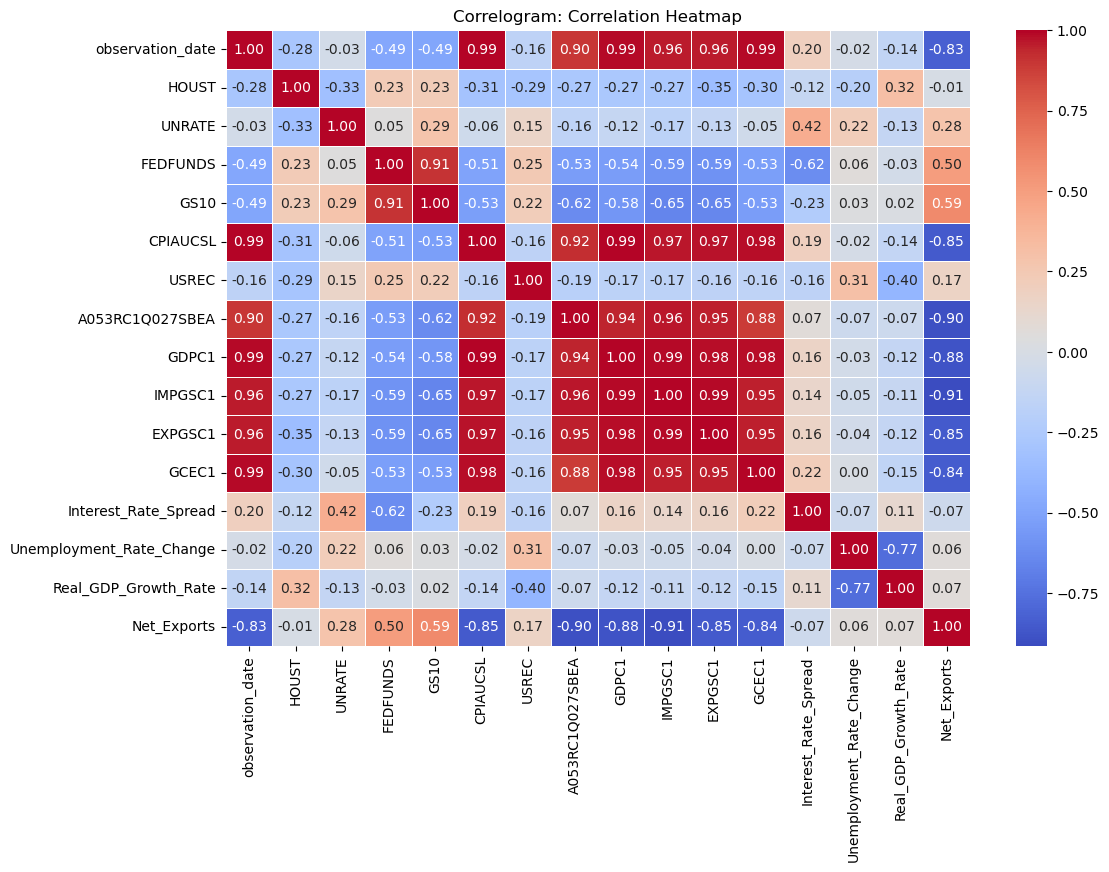

In [ ]:
corr_matrix = economic_indicators_cleaned.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlogram: Correlation Heatmap")
plt.show()


Our problem statement is whether the U.S. economy is heading toward a recession or growth. Instead of predicting GDP growth directly, we train a model using economic indicators as features and the recession indicator as the target. 
I added the Interest Rate Spread to track the gap between long-term and short-term interest rates, as a narrowing or negative spread signals a potential recession. 
Unemployment Rate Change captures shifts in the job market, where rising unemployment suggests economic weakness. 
Real GDP Growth Rate measures economic expansion or contraction, while Net Exports reflect trade balance, with a surplus indicating growth and a deficit signaling weakness. 
Feature importance analysis showed that Unemployment Rate Change and Real GDP Growth Rate ranked highest, contributing more to recession predictions than their original features. 
Net Exports ranked fourth, outperforming Real Imports and Real Exports, justifying their removal, while Interest Rate Spread ranked eighth, indicating a smaller impact than the Federal Funds Rate and 10-Year Treasury Yield. 
The heatmap confirmed these findings, showing strong correlations between the features and the recession indicator. Real GDP Growth Rate was negatively correlated with recessions, while Unemployment Rate Change was positively correlated. This aligns with economic expectations. 
The heatmap also raises concerns around many features that are extremely correlated, which might indicate the fact they are redundant, and in which case require dropping. 